In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
import tensorflow as tf
from tensorflow.keras import models, layers, Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
from tensorflow.keras.datasets import mnist

import warnings

In [2]:
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model, load_model

inputs_1 = Input(shape=(2,))
hidden1_1 = Dense(4, activation='elu')(inputs_1)
output_1 = Dense(2, activation='sigmoid')(hidden1_1)
model_1 = Model(inputs=inputs_1, outputs=output_1)

inputs_2 = Input(shape=(4,))
hidden2_1 = Dense(4, activation='elu')(inputs_2)
hidden2_2 = Dense(2, activation='elu')(hidden2_1)
output_2 = Dense(2, activation='sigmoid')(hidden2_2)
model_2 = Model(inputs=inputs_2, outputs=output_2)

2022-10-31 09:42:50.962401: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model_1.summary()
# Model: "model_9"
# _________________________________________________________________
#  Layer (type)                Output Shape              Param #   
# =================================================================
#  input_10 (InputLayer)       [(None, 2)]               0         
                                                                 
#  dense_21 (Dense)            (None, 4)                 12        
                                                                 
#  dense_22 (Dense)            (None, 2)                 10        
                                                                 
# =================================================================
# Total params: 22
# Trainable params: 22
# Non-trainable params: 0
# _________________________________________________________________

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 2)]               0         
                                                                 
 dense_21 (Dense)            (None, 4)                 12        
                                                                 
 dense_22 (Dense)            (None, 2)                 10        
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


In [10]:
model_2.summary()
# Model: "model_10"
# _________________________________________________________________
#  Layer (type)                Output Shape              Param #   
# =================================================================
#  input_11 (InputLayer)       [(None, 4)]               0         
                                                                 
#  dense_23 (Dense)            (None, 4)                 20        
                                                                 
#  dense_24 (Dense)            (None, 2)                 10        
                                                                 
#  dense_25 (Dense)            (None, 2)                 6         
                                                                 
# =================================================================
# Total params: 36
# Trainable params: 36
# Non-trainable params: 0
# _________________________________________________________________

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 4)]               0         
                                                                 
 dense_23 (Dense)            (None, 4)                 20        
                                                                 
 dense_24 (Dense)            (None, 2)                 10        
                                                                 
 dense_25 (Dense)            (None, 2)                 6         
                                                                 
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________


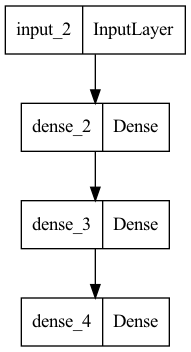

In [4]:
from tensorflow.keras.utils import plot_model

plot_model(model_2)

In [12]:
!pip install pydot

In [5]:
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model, load_model

inputs_1 = Input(shape=(2,))
hidden1_1 = Dense(4, activation='elu')(inputs_1)
output_1 = Dense(2, activation='sigmoid')(hidden1_1)
model_1 = Model(inputs=inputs_1, outputs=output_1)

inputs_2 = Input(shape=(4,))
hidden2_1 = Dense(4, activation='elu')(inputs_2)
hidden2_2 = Dense(2, activation='elu')(hidden2_1)
output_2 = Dense(2, activation='sigmoid')(hidden2_2)
model_2 = Model(inputs=inputs_2, outputs=output_2)

# 두개의 인공 신경망의 출력을 연결(concatenate)
result = concatenate([model_1.output, model_2.output])

z = Dense(2, activation="relu")(result)
z = Dense(1, activation="linear")(z)

model_A = Model(inputs=[model_1.input, model_2.input], outputs=z)

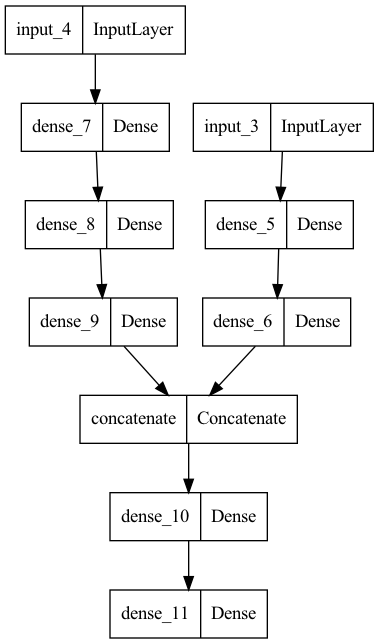

In [6]:
plot_model(model_A)

In [10]:
np.rand

0.7738208840377425

## no xavier initialization

In [50]:
xor = {'x1':[0,0,1,1], 'x2':[0,1,0,1], 'y':[0,1,1,0]}
XOR = pd.DataFrame(xor)
X = XOR.drop('y', axis=1)
y = XOR.y

ip = Input(shape=(2,))
n = Dense(2, activation='sigmoid')(ip)
n = Dense(1, activation='linear')(n)
model = Model(inputs=ip, outputs=n)

model.compile(loss='mse', optimizer='rmsprop')
model.fit(X, y, epochs=1400, verbose=0)
model.predict(X)

1/1 [==============================] - 0s 32ms/step


array([[0.5],
       [0.5],
       [0.5],
       [0.5]], dtype=float32)

## with xavier initialization 

In [26]:
xor = {'x1':[0,0,1,1], 'x2':[0,1,0,1], 'y':[0,1,1,0]}
XOR = pd.DataFrame(xor)
X = XOR.drop('y', axis=1)
y = XOR.y

ip = Input(shape=(2,))
n = Dense(2, activation='sigmoid')(ip)
n = Dense(1, activation='linear')(n)
model = Model(inputs=ip, outputs=n)

weights = model.get_weights()
xavier_w12 = np.random.randn(2, 2) / np.sqrt(2)
xavier_w21 = np.random.randn(2, 1) / np.sqrt(2)
xavier_weights = weights
xavier_weights[0] = xavier_w12
xavier_weights[2] = xavier_w21
model.set_weights(xavier_weights)


model.compile(loss='mse', optimizer='rmsprop')
model.fit(X, y, epochs=1400, verbose=0)
model.predict(X)

1/1 [==============================] - 0s 43ms/step


array([[0.27620232],
       [0.6693047 ],
       [0.6670073 ],
       [0.48056066]], dtype=float32)

## with xavier initialization & tanh

In [27]:
xor = {'x1':[0,0,1,1], 'x2':[0,1,0,1], 'y':[0,1,1,0]}
XOR = pd.DataFrame(xor)
X = XOR.drop('y', axis=1)
y = XOR.y

ip = Input(shape=(2,))
n = Dense(2, activation='tanh')(ip)
n = Dense(1, activation='linear')(n)
model = Model(inputs=ip, outputs=n)

weights = model.get_weights()
xavier_w12 = np.random.randn(2, 2) / np.sqrt(2)
xavier_w21 = np.random.randn(2, 1) / np.sqrt(2)
xavier_weights = weights
xavier_weights[0] = xavier_w12
xavier_weights[2] = xavier_w21
model.set_weights(xavier_weights)


model.compile(loss='mse', optimizer='rmsprop')
model.fit(X, y, epochs=1400, verbose=0)model.predict(X)

1/1 [==============================] - 0s 38ms/step


array([[0.05215487],
       [0.9226097 ],
       [0.89803505],
       [0.13310495]], dtype=float32)

## with xavier initialization & relu

In [46]:
xor = {'x1':[0,0,1,1], 'x2':[0,1,0,1], 'y':[0,1,1,0]}
XOR = pd.DataFrame(xor)
X = XOR.drop('y', axis=1)
y = XOR.y

ip = Input(shape=(2,))
n = Dense(2, activation='relu')(ip)
n = Dense(1, activation='linear')(n)
model = Model(inputs=ip, outputs=n)

weights = model.get_weights()
xavier_w12 = np.random.randn(2, 2) / np.sqrt(2)
xavier_w21 = np.random.randn(2, 1) / np.sqrt(2)
xavier_weights = weights
xavier_weights[0] = xavier_w12
xavier_weights[2] = xavier_w21
model.set_weights(xavier_weights)


model.compile(loss='mse', optimizer='rmsprop')
model.fit(X, y, epochs=1400, verbose=0)
model.predict(X)

1/1 [==============================] - 0s 34ms/step


array([[0.5],
       [0.5],
       [0.5],
       [0.5]], dtype=float32)

## with xavier initialization & selu

In [44]:
xor = {'x1':[0,0,1,1], 'x2':[0,1,0,1], 'y':[0,1,1,0]}
XOR = pd.DataFrame(xor)
X = XOR.drop('y', axis=1)
y = XOR.y

ip = Input(shape=(2,))
n = Dense(2, activation='selu')(ip)
n = Dense(1, activation='linear')(n)
model = Model(inputs=ip, outputs=n)

weights = model.get_weights()
xavier_w12 = np.random.randn(2, 2) / np.sqrt(2)
xavier_w21 = np.random.randn(2, 1) / np.sqrt(2)
xavier_weights = weights
xavier_weights[0] = xavier_w12
xavier_weights[2] = xavier_w21
model.set_weights(xavier_weights)


model.compile(loss='mse', optimizer='rmsprop')
model.fit(X, y, epochs=1400, verbose=0)
model.predict(X)

1/1 [==============================] - 0s 32ms/step


array([[0.00674134],
       [0.9894619 ],
       [0.9976773 ],
       [0.01796421]], dtype=float32)

In [59]:
xor = {'x1':[0,0,1,1], 'x2':[0,1,0,1], 'y':[0,1,1,0]}
XOR = pd.DataFrame(xor)
X = XOR.drop('y', axis=1)
y = XOR.y

ip = Input(shape=(2,))
n = Dense(2, activation='relu', kernel_initializer=initializer1)(ip)
n = Dense(1, activation='linear')(n)
model = Model(inputs=ip, outputs=n)

weights = model.get_weights()
xavier_w12 = np.random.randn(2, 2) / np.sqrt(2/2)
xavier_w21 = np.random.randn(2, 1) / np.sqrt(2/2)
xavier_weights = weights
xavier_weights[0] = xavier_w12
xavier_weights[2] = xavier_w21
model.set_weights(xavier_weights)


model.compile(loss='mse', optimizer='rmsprop')
model.fit(X, y, epochs=1400, verbose=0)
model.predict(X)

1/1 [==============================] - 0s 31ms/step


array([[-0.00141793],
       [ 0.9977717 ],
       [ 0.68207806],
       [ 0.3161961 ]], dtype=float32)

In [60]:
initializer1 = keras.initializers.RandomNormal(mean=0, stddev=1.)
initializer2 = keras.initializers.RandomUniform(minval=0, maxval=1.)
initializer3 = keras.initializers.TruncatedNormal(mean=0., stddev=1.)
initializer4 = keras.initializers.Zeros()
initializer5 = keras.initializers.Ones()
initializer6 = keras.initializers.GlorotNormal()
initializer7 = keras.initializers.GlorotUniform()
initializer8 = keras.initializers.HeNormal()
initializer9 = keras.initializers.HeUniform()

## Keras Code

In [63]:
xor = {'x1':[0,0,1,1], 'x2':[0,1,0,1], 'y':[0,1,1,0]}
XOR = pd.DataFrame(xor)
X = XOR.drop('y', axis=1)
y = XOR.y

ip = Input(shape=(2,))
n = Dense(2, activation='sigmoid', kernel_initializer=initializer9)(ip)
n = Dense(1, activation='linear')(n)
model = Model(inputs=ip, outputs=n)

model.compile(loss='mse', optimizer='rmsprop')
model.fit(X, y, epochs=1400, verbose=0)
model.predict(X)

1/1 [==============================] - 0s 32ms/step


array([[0.42412725],
       [0.5755189 ],
       [0.5576049 ],
       [0.44671255]], dtype=float32)

In [64]:
from tensorflow.keras import initializers
import matplotlib.pyplot as plt
def xor_practice(initializer, activation, epochs, optimizer):
    xor = {'x1':[0,0,1,1], 'x2':[0,1,0,1], 'y':[0,1,1,0]}
    XOR = pd.DataFrame(xor)
    X = XOR.drop('y', axis=1)
    y = XOR.y
    
    initializer = initializers.RandomNormal()
    ip = Input(shape=(2,))
    n = Dense(2, activation=activation, kernel_initializer=initializer)(ip)
    n = Dense(1, activation='linear', kernel_initializer=initializer)(n)
    model = Model(inputs=ip, outputs=n)
    model.compile(loss='mse', optimizer=optimizer, metrics='accuracy')
    hist = model.fit(X, y, epochs=epochs, verbose=0)
    fig, loss_ax = plt.subplots()
    loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
    loss_ax.plot(hist.history['accuracy'], 'y', label='train accuracy', c='red')
    plt.plot(range(epochs), [0.15 for _ in range(epochs)], linestyle='--')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    loss_ax.legend(loc='upper left')
    loss_ax.set_ylim(0, 1)
    plt.show()
    
    return model.predict(X)

/Users/werther/opt/anaconda3/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_

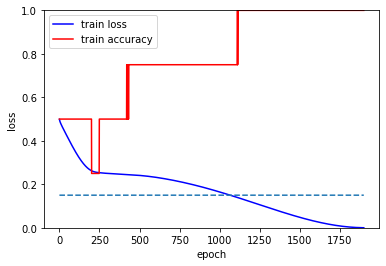

1/1 [==============================] - 0s 47ms/step


/Users/werther/opt/anaconda3/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_

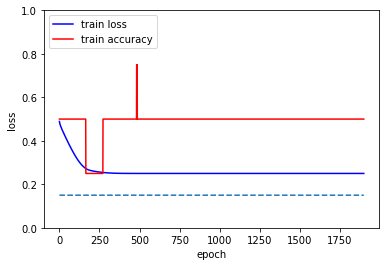

1/1 [==============================] - 0s 43ms/step


/Users/werther/opt/anaconda3/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_

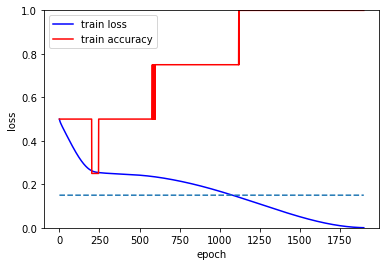

1/1 [==============================] - 0s 44ms/step


/Users/werther/opt/anaconda3/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_

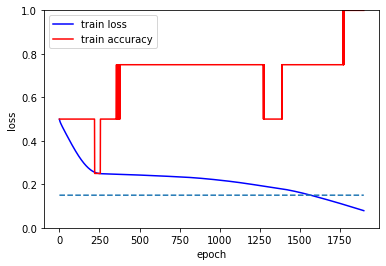

1/1 [==============================] - 0s 41ms/step


/Users/werther/opt/anaconda3/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_

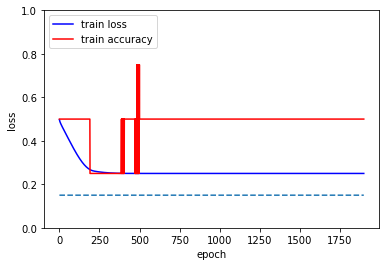

1/1 [==============================] - 0s 39ms/step


In [67]:
initializer = keras.initializers.TruncatedNormal(mean=0, stddev=1.)
activation = 'elu'
epochs = 1900
optimizer = 'rmsprop'

for _ in range(5) : 
    xor_practice(initializer, activation, epochs, optimizer)

/Users/werther/opt/anaconda3/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_

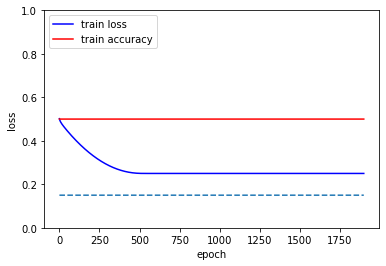

1/1 [==============================] - 0s 43ms/step


/Users/werther/opt/anaconda3/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_

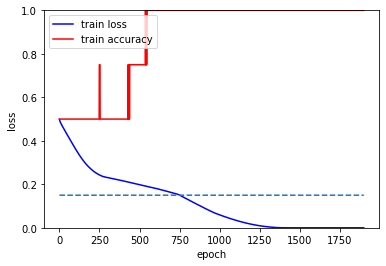

1/1 [==============================] - 0s 43ms/step


/Users/werther/opt/anaconda3/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_

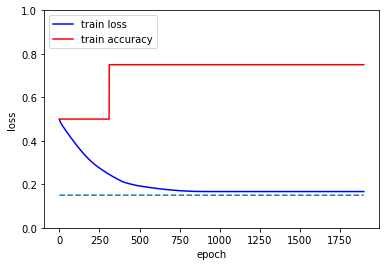

1/1 [==============================] - 0s 47ms/step


/Users/werther/opt/anaconda3/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_

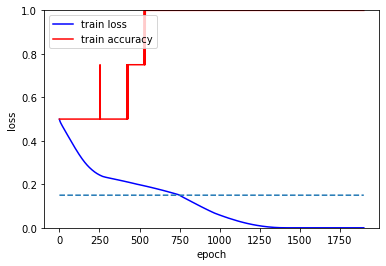

1/1 [==============================] - 0s 42ms/step


/Users/werther/opt/anaconda3/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_

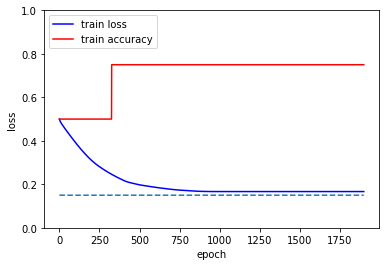

1/1 [==============================] - 0s 42ms/step


In [68]:
initializer = keras.initializers.TruncatedNormal(mean=0, stddev=1.)
activation = 'ReLU'
epochs = 1900
optimizer = 'rmsprop'

for _ in range(5) : 
    xor_practice(initializer, activation, epochs, optimizer)

/Users/werther/opt/anaconda3/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_

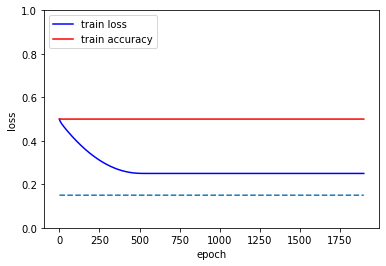

1/1 [==============================] - 0s 43ms/step


/Users/werther/opt/anaconda3/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_

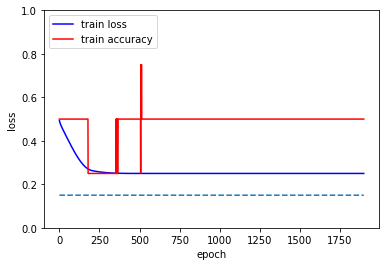

1/1 [==============================] - 0s 43ms/step


/Users/werther/opt/anaconda3/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_

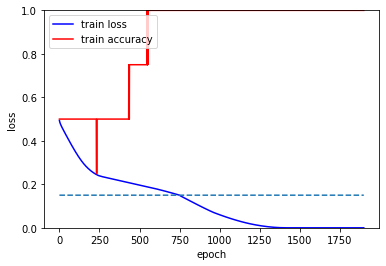

1/1 [==============================] - 0s 45ms/step


/Users/werther/opt/anaconda3/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_

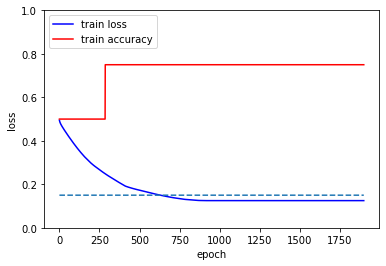

1/1 [==============================] - 0s 41ms/step


/Users/werther/opt/anaconda3/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_

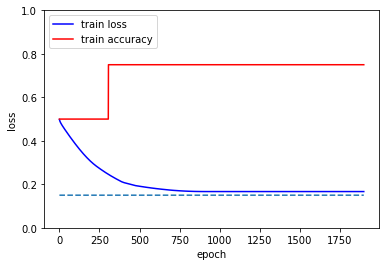

1/1 [==============================] - 0s 43ms/step


In [69]:
initializer = keras.initializers.Ones()
activation = 'ReLU'
epochs = 1900
optimizer = 'rmsprop'

for _ in range(5) : 
    xor_practice(initializer, activation, epochs, optimizer)

/Users/werther/opt/anaconda3/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_

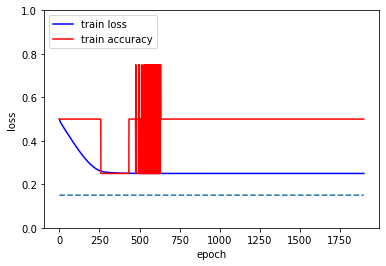

1/1 [==============================] - 0s 41ms/step


/Users/werther/opt/anaconda3/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_

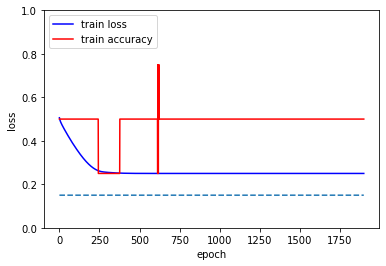

1/1 [==============================] - 0s 49ms/step


/Users/werther/opt/anaconda3/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_

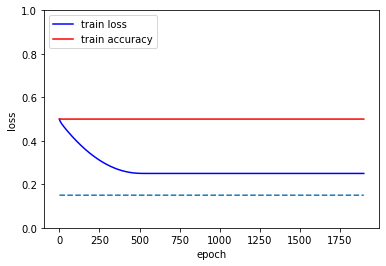

1/1 [==============================] - 0s 45ms/step


/Users/werther/opt/anaconda3/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_

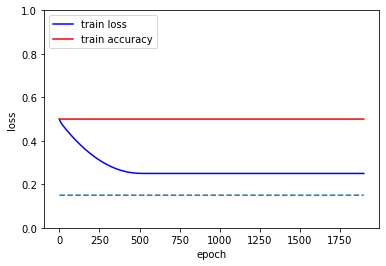

1/1 [==============================] - 0s 39ms/step


/Users/werther/opt/anaconda3/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_

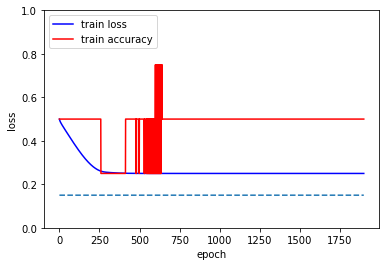

1/1 [==============================] - 0s 39ms/step


In [70]:
initializer = keras.initializers.Zeros()
activation = 'ReLU'
epochs = 1900
optimizer = 'rmsprop'

for _ in range(5) : 
    xor_practice(initializer, activation, epochs, optimizer)

/Users/werther/opt/anaconda3/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_

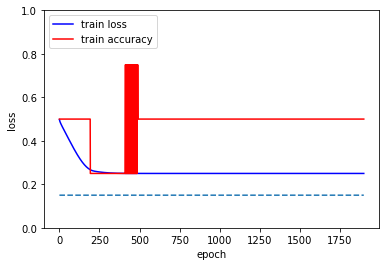

1/1 [==============================] - 0s 46ms/step


/Users/werther/opt/anaconda3/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_

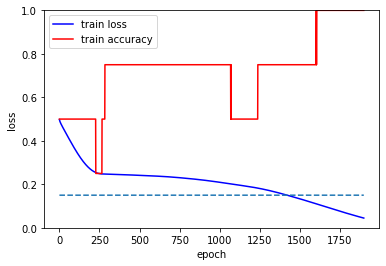

1/1 [==============================] - 0s 45ms/step


/Users/werther/opt/anaconda3/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_

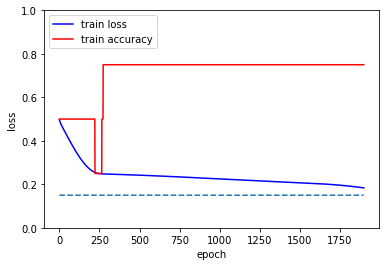

1/1 [==============================] - 0s 46ms/step


/Users/werther/opt/anaconda3/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_

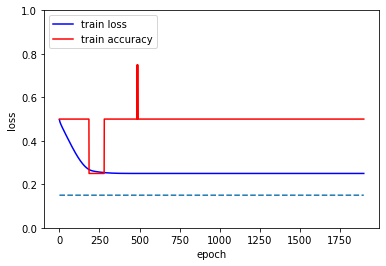

1/1 [==============================] - 0s 42ms/step


/Users/werther/opt/anaconda3/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_

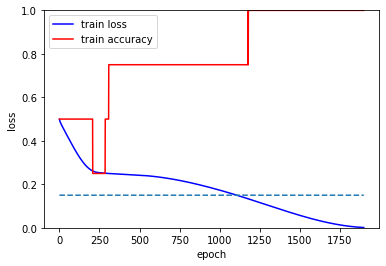

1/1 [==============================] - 0s 41ms/step


In [76]:
initializer = keras.initializers.HeNormal()
activation = 'elu'
epochs = 1900
optimizer = 'rmsprop'

for _ in range(5) : 
    xor_practice(initializer, activation, epochs, optimizer)

/Users/werther/opt/anaconda3/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_

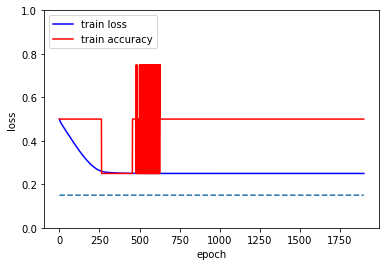

1/1 [==============================] - 0s 46ms/step


/Users/werther/opt/anaconda3/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_

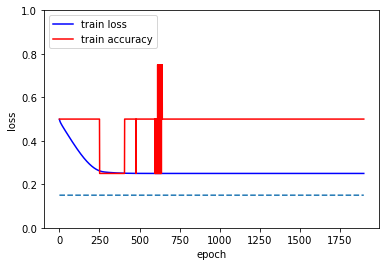

1/1 [==============================] - 0s 47ms/step


/Users/werther/opt/anaconda3/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_

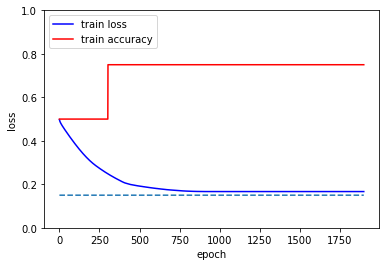

1/1 [==============================] - 0s 48ms/step


/Users/werther/opt/anaconda3/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_

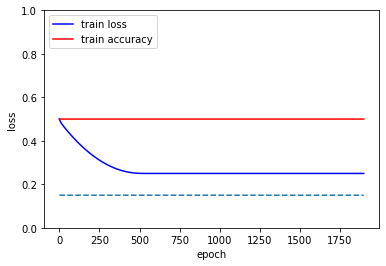

1/1 [==============================] - 0s 40ms/step


/Users/werther/opt/anaconda3/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_

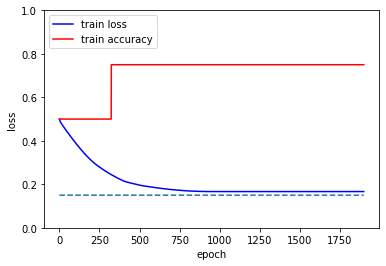

1/1 [==============================] - 0s 43ms/step


In [77]:
initializer = keras.initializers.GlorotNormal()
activation = 'ReLU'
epochs = 1900
optimizer = 'rmsprop'

for _ in range(5) : 
    xor_practice(initializer, activation, epochs, optimizer)

/Users/werther/opt/anaconda3/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_

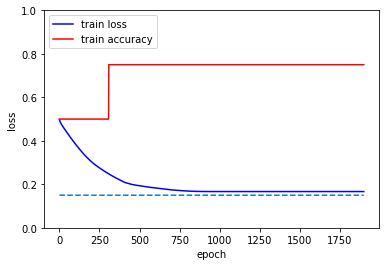

1/1 [==============================] - 0s 44ms/step


/Users/werther/opt/anaconda3/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_

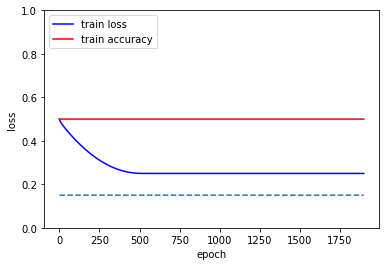

1/1 [==============================] - 0s 44ms/step


/Users/werther/opt/anaconda3/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_

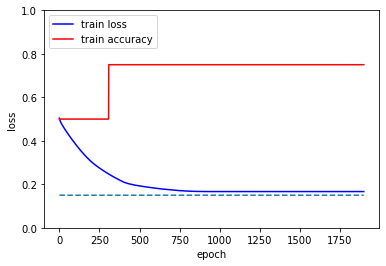

1/1 [==============================] - 0s 45ms/step


/Users/werther/opt/anaconda3/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_

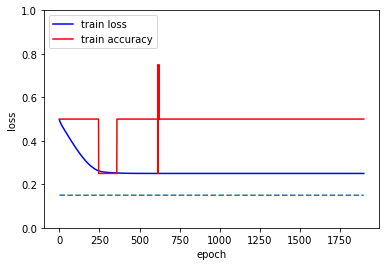

1/1 [==============================] - 0s 42ms/step


/Users/werther/opt/anaconda3/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/2526887118.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_

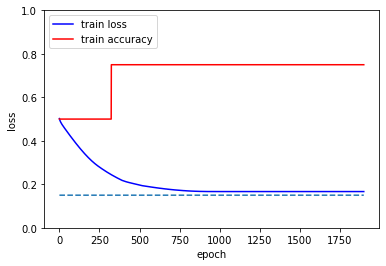

1/1 [==============================] - 0s 46ms/step


In [75]:
initializer = keras.initializers.HeUniform()
activation = 'ReLU'
epochs = 1900
optimizer = 'rmsprop'

for _ in range(5) : 
    xor_practice(initializer, activation, epochs, optimizer)

In [78]:
initializer1 = keras.initializers.RandomNormal(mean=0, stddev=1.)
initializer2 = keras.initializers.RandomUniform(minval=0,maxval=1.)
initializer3 = keras.initializers.TruncatedNormal(mean=0, stddev=1.)
initializer4 = keras.initializers.Zeros()
initializer5 = keras.initializers.Ones()
initializer6 = keras.initializers.GlorotNormal() #Xavier
initializer7 = keras.initializers.GlorotUniform() #Xavier
initializer8 = keras.initializers.HeNormal() #He
initializer9 = keras.initializers.HeUniform() #He
from tensorflow.keras import initializers
import matplotlib.pyplot as plt
def xor_practice2(activation, epochs, optimizer):
    fig = plt.figure(figsize=(30, 15))
    for i in range(9):
        globals()[f'ax{i+1}'] = fig.add_subplot(3, 3, i+1)
    for i in range(9):
        xor = {'x1':[0,0,1,1], 'x2':[0,1,0,1], 'y':[0,1,1,0]}
        XOR = pd.DataFrame(xor)
        X = XOR.drop('y', axis=1)
        y = XOR.y
        ip = Input(shape=(2,))
        n = Dense(2, activation=activation, kernel_initializer=globals()[f'initializer{i+1}'])(ip)
        n = Dense(1, activation='linear', kernel_initializer=globals()[f'initializer{i+1}'])(n)
        model = Model(inputs=ip, outputs=n)
        model.compile(loss='mse', optimizer=optimizer, metrics='accuracy')
        hist = model.fit(X, y, epochs=epochs, verbose=0)
        globals()[f'ax{i+1}'].plot(hist.history['loss'], 'y', label='train loss', c='blue')
        globals()[f'ax{i+1}'].plot(hist.history['accuracy'], 'y', label='train accuracy', c='red')
        plt.plot(range(epochs), [0.15 for _ in range(epochs)], linestyle='--')
        globals()[f'ax{i+1}'].set_xlabel('epoch')
        globals()[f'ax{i+1}'].set_ylabel('loss')
        globals()[f'ax{i+1}'].legend(loc='upper left')
        globals()[f'ax{i+1}'].set_ylim(0, 1)
    plt.show()

/Users/werther/opt/anaconda3/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/869192432.py:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  globals()[f'ax{i+1}'].plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/869192432.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precede

/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/869192432.py:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  globals()[f'ax{i+1}'].plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/869192432.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  globals()[f'ax{i+1}'].plot(hist.history['accuracy'], 'y', label='train accuracy', c='red')


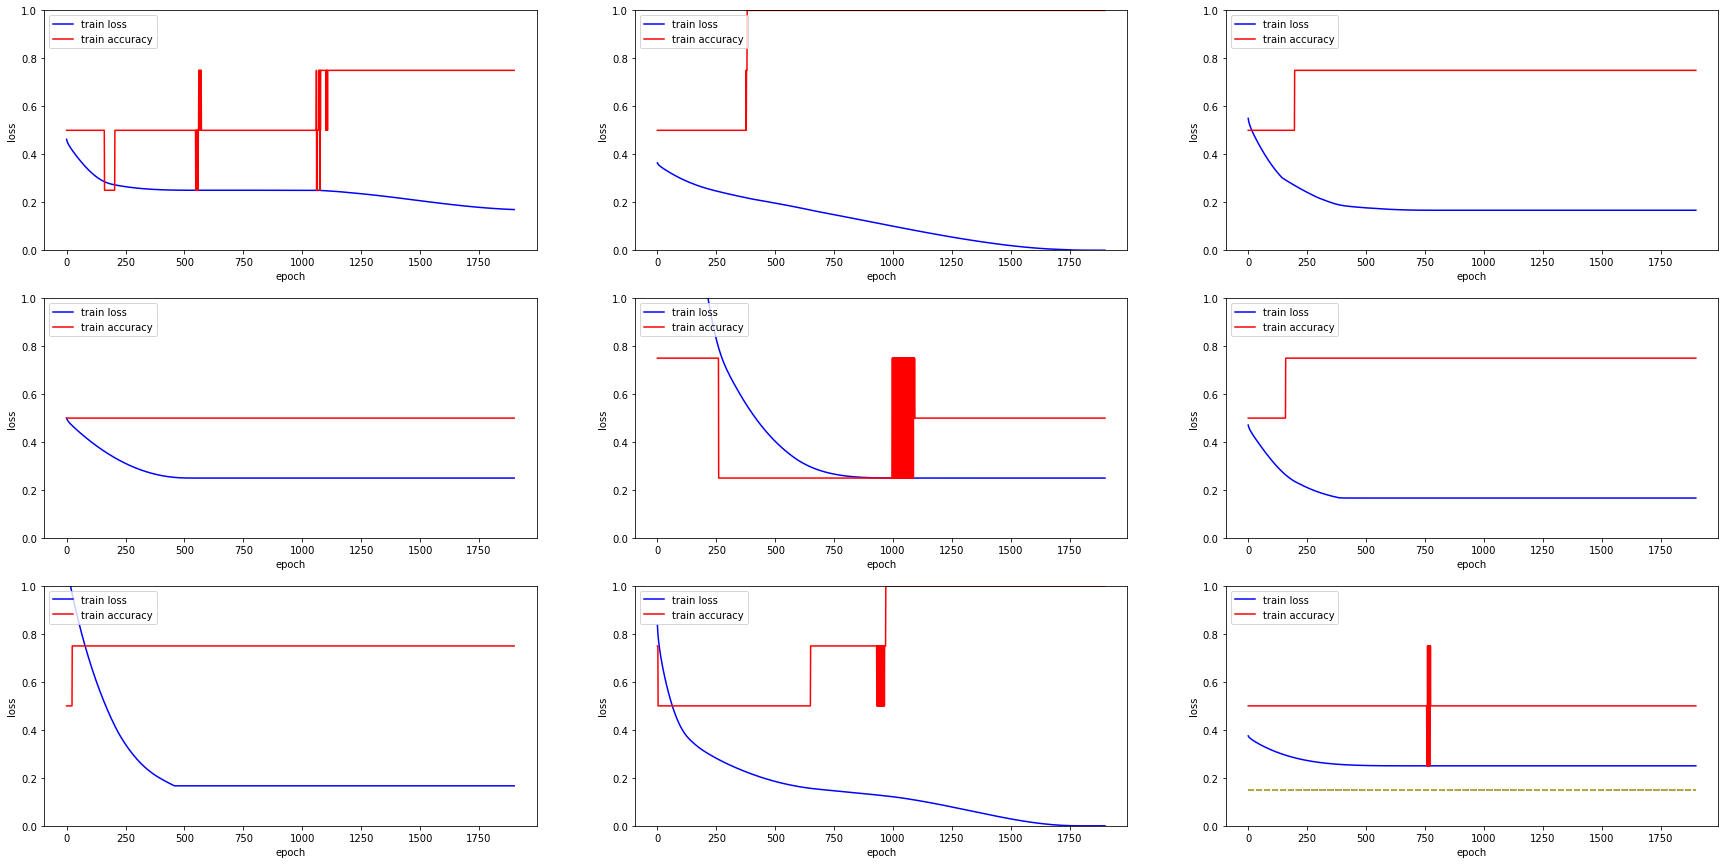

In [81]:
initializer = keras.initializers.HeUniform()
activation = 'ReLU'
epochs = 1900
optimizer = 'rmsprop'
xor_practice2(activation, epochs, optimizer)

## Batch vs Layer Normalizaion

In [89]:
from tensorflow.keras.layers import BatchNormalization, LayerNormalization

xor = {'x1':[0,0,1,1], 'x2':[0,1,0,1], 'y':[0,1,1,0]}
XOR = pd.DataFrame(xor)
X = XOR.drop('y', axis=1)
y = XOR.y

ip = Input(shape=(2,))
n = BatchNormalization()(ip)
n = Dense(2, activation='sigmoid')(n)
n = BatchNormalization()(n)
n = Dense(1, activation='linear')(n)
model_A = Model(inputs=ip, outputs=n)


model_A.compile(loss='mse', optimizer='rmsprop')
model_A.fit(X, y, epochs=1400, verbose=0)
model_A.predict(X)

1/1 [==============================] - 0s 55ms/step


array([[ 0.49643865],
       [ 0.98378444],
       [ 0.49591395],
       [-0.01808283]], dtype=float32)

In [90]:
from tensorflow.keras import initializers
import matplotlib.pyplot as plt
def xor_practice3(initializer, activation, epochs, optimizer):
    xor = {'x1':[0,0,1,1], 'x2':[0,1,0,1], 'y':[0,1,1,0]}
    XOR = pd.DataFrame(xor)
    X = XOR.drop('y', axis=1)
    y = XOR.y
    
    initializer = initializers.RandomNormal()
    ip = Input(shape=(2,))
    n = BatchNormalization()(ip)
    n = Dense(2, activation='sigmoid')(n)
    n = BatchNormalization()(n)
    n = Dense(1, activation='linear')(n)
    model = Model(inputs=ip, outputs=n)
    model.compile(loss='mse', optimizer=optimizer, metrics='accuracy')
    hist = model.fit(X, y, epochs=epochs, verbose=0)
    fig, loss_ax = plt.subplots()
    loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
    loss_ax.plot(hist.history['accuracy'], 'y', label='train accuracy', c='red')
    plt.plot(range(epochs), [0.15 for _ in range(epochs)], linestyle='--')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    loss_ax.legend(loc='upper left')
    loss_ax.set_ylim(0, 1)
    plt.show()
    
    return model.predict(X)

/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/4075973388.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/4075973388.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['accuracy'], 'y', label='train accuracy', c='red')


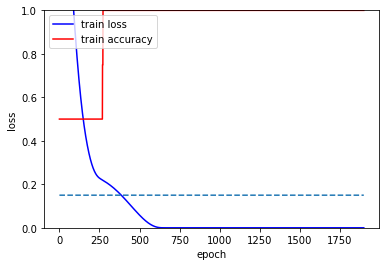

1/1 [==============================] - 0s 66ms/step


/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/4075973388.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/4075973388.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['accuracy'], 'y', label='train accuracy', c='red')


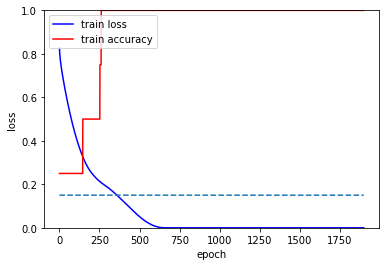

1/1 [==============================] - 0s 64ms/step


/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/4075973388.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/4075973388.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['accuracy'], 'y', label='train accuracy', c='red')


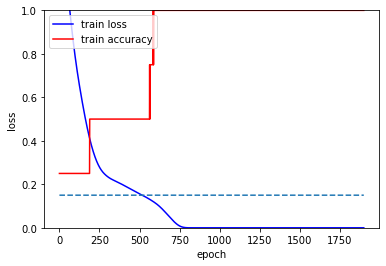

1/1 [==============================] - 0s 68ms/step


/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/4075973388.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/4075973388.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['accuracy'], 'y', label='train accuracy', c='red')


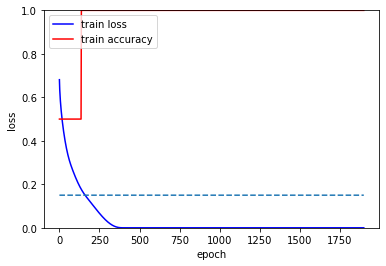

1/1 [==============================] - 0s 66ms/step


/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/4075973388.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/4075973388.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['accuracy'], 'y', label='train accuracy', c='red')


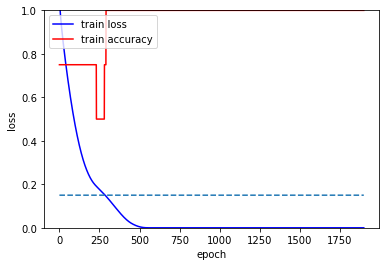

1/1 [==============================] - 0s 65ms/step


In [91]:
initializer = keras.initializers.GlorotNormal()
activation = 'ReLU'
epochs = 1900
optimizer = 'rmsprop'

for _ in range(5) : 
    xor_practice3(initializer, activation, epochs, optimizer)

In [92]:
from tensorflow.keras import initializers
import matplotlib.pyplot as plt
def xor_practice4(initializer, activation, epochs, optimizer):
    xor = {'x1':[0,0,1,1], 'x2':[0,1,0,1], 'y':[0,1,1,0]}
    XOR = pd.DataFrame(xor)
    X = XOR.drop('y', axis=1)
    y = XOR.y
    
    initializer = initializers.RandomNormal()
    ip = Input(shape=(2,))
    n = LayerNormalization()(ip)
    n = Dense(2, activation='sigmoid')(n)
    n = LayerNormalization()(n)
    n = Dense(1, activation='linear')(n)
    model = Model(inputs=ip, outputs=n)
    model.compile(loss='mse', optimizer=optimizer, metrics='accuracy')
    hist = model.fit(X, y, epochs=epochs, verbose=0)
    
    fig, loss_ax = plt.subplots()
    loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
    loss_ax.plot(hist.history['accuracy'], 'y', label='train accuracy', c='red')
    plt.plot(range(epochs), [0.15 for _ in range(epochs)], linestyle='--')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    loss_ax.legend(loc='upper left')
    loss_ax.set_ylim(0, 1)
    plt.show()
    
    return model.predict(X)

/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/3359307582.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/3359307582.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['accuracy'], 'y', label='train accuracy', c='red')


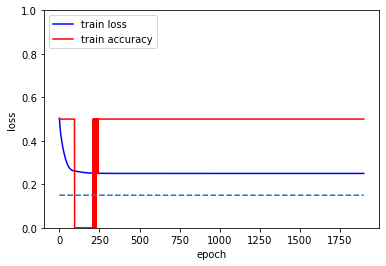

1/1 [==============================] - 0s 97ms/step


/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/3359307582.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/3359307582.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['accuracy'], 'y', label='train accuracy', c='red')


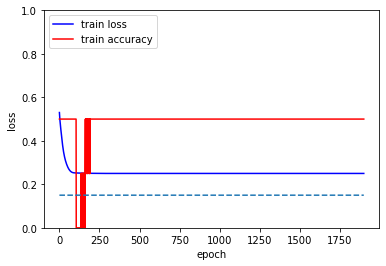

1/1 [==============================] - 0s 95ms/step


/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/3359307582.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/3359307582.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['accuracy'], 'y', label='train accuracy', c='red')


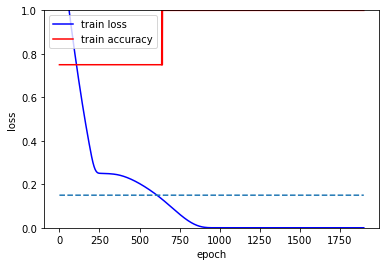

1/1 [==============================] - 0s 104ms/step


/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/3359307582.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/3359307582.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['accuracy'], 'y', label='train accuracy', c='red')


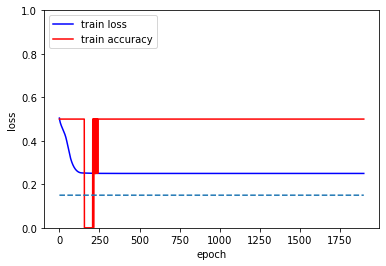

1/1 [==============================] - 0s 94ms/step


/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/3359307582.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/3359307582.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['accuracy'], 'y', label='train accuracy', c='red')


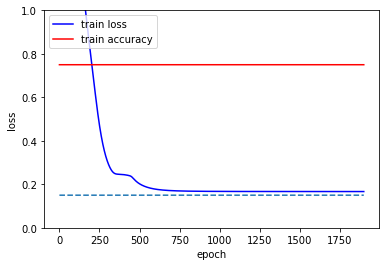

1/1 [==============================] - 0s 94ms/step


In [94]:
initializer = keras.initializers.GlorotNormal()
activation = 'ReLU'
epochs = 1900
optimizer = 'rmsprop'

for _ in range(5) : 
    xor_practice4(initializer, activation, epochs, optimizer)

/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/4075973388.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/4075973388.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['accuracy'], 'y', label='train accuracy', c='red')


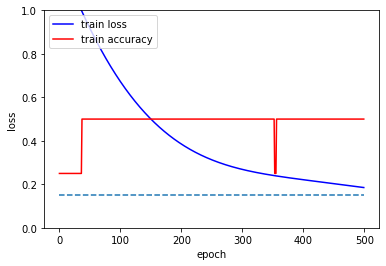

1/1 [==============================] - 0s 70ms/step


/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/4075973388.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/4075973388.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['accuracy'], 'y', label='train accuracy', c='red')


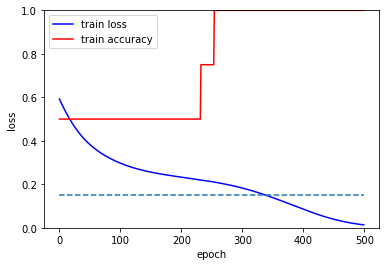

1/1 [==============================] - 0s 69ms/step


/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/4075973388.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/4075973388.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['accuracy'], 'y', label='train accuracy', c='red')


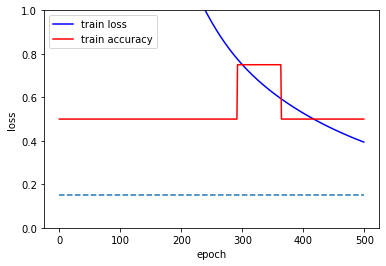

1/1 [==============================] - 0s 69ms/step


/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/4075973388.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/4075973388.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['accuracy'], 'y', label='train accuracy', c='red')


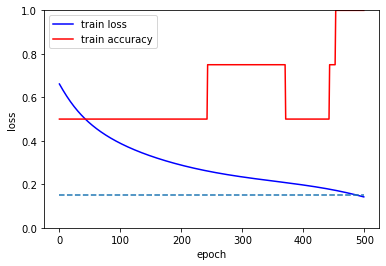

1/1 [==============================] - 0s 71ms/step


/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/4075973388.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_1449/4075973388.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['accuracy'], 'y', label='train accuracy', c='red')


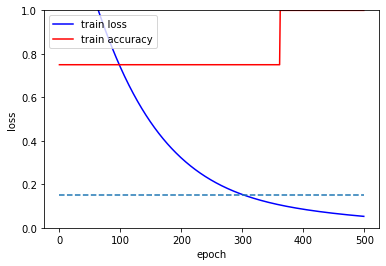

1/1 [==============================] - 0s 69ms/step


In [97]:
initializer = keras.initializers.RandomNormal()
activation = 'sigmoid'
epochs = 500
optimizer = 'adam'

for _ in range(5) : 
    xor_practice3(initializer, activation, epochs, optimizer)

In [ ]:
initializer = keras.initializers.RandomNormal()
activation = 'sigmoid'
epochs = 500
optimizer = 'rmsprop'

for _ in range(5) : 
    xor_practice3(initializer, activation, epochs, optimizer)

## 과적합 방지

In [ ]:
from tensorflow.keras import initializers
import matplotlib.pyplot as plt
def xor_practice3(initializer, activation, epochs, optimizer):
    xor = {'x1':[0,0,1,1], 'x2':[0,1,0,1], 'y':[0,1,1,0]}
    XOR = pd.DataFrame(xor)
    X = XOR.drop('y', axis=1)
    y = XOR.y
    
    initializer = initializers.RandomNormal()
    ip = Input(shape=(2,))
    n = BatchNormalization()(ip)
    n = Dense(2, activation='sigmoid')(n)
    n = BatchNormalization()(n)
    n = Dense(1, activation='linear')(n)
    model = Model(inputs=ip, outputs=n)
    model.compile(loss='mse', optimizer=optimizer, metrics='accuracy')
    hist = model.fit(X, y, epochs=epochs, verbose=0)
    fig, loss_ax = plt.subplots()
    loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
    loss_ax.plot(hist.history['accuracy'], 'y', label='train accuracy', c='red')
    plt.plot(range(epochs), [0.15 for _ in range(epochs)], linestyle='--')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    loss_ax.legend(loc='upper left')
    loss_ax.set_ylim(0, 1)
    plt.show()
    
    return model.predict(X)

In [98]:
from tensorflow.keras.layers import Dropout

xor = {'x1':[0,0,1,1], 'x2':[0,1,0,1], 'y':[0,1,1,0]}
XOR = pd.DataFrame(xor)
X = XOR.drop('y', axis=1)
y = XOR.y

initializer = initializers.RandomNormal()
ip = Input(shape=(2,))
n = Dropout(0.5)(ip)
n = Dense(2, activation='sigmoid')(n)
n = Dropout(0.5)(n)
n = Dense(1, activation='linear')(n)
model = Model(inputs=ip, outputs=n)
model.compile(loss='mse', optimizer=optimizer, metrics='accuracy')
hist = model.fit(X, y, epochs=epochs, verbose=0)

In [101]:
model = Sequential()
model.add(Dense(256, input_shape=(2,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, input_shape=(2,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))